In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("The files has been loaded onto google drive")

Mounted at /content/drive
The files has been loaded onto google drive


In [3]:
file_path = '/content/drive/My Drive/streamworks_user_data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset 'streamworks_user_data.csv' has been loaded successfully.")
    print("\n Initial Data Exploration (First 5 rows) ")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

Dataset 'streamworks_user_data.csv' has been loaded successfully.

 Initial Data Exploration (First 5 rows) 
   user_id   age  gender signup_date last_active_date  country  \
0   1001.0  56.0   Other    02-04-25         13-07-25   France   
1   1002.0  69.0    Male    02-01-23         13-07-25    India   
2   1003.0  46.0    Male    21-08-22         13-07-25       UK   
3   1004.0  32.0   Other    14-09-23         13-07-25  Germany   
4   1005.0  60.0  Female    29-07-23         13-07-25    India   

  subscription_type  average_watch_hours  mobile_app_usage_pct  \
0          Standard                 42.6                  77.4   
1             Basic                 65.3                  98.0   
2           Premium                 40.1                  47.8   
3           Premium                  5.8                  53.2   
4          Standard                 32.7                  16.8   

   complaints_raised received_promotions referred_by_friend  is_churned  \
0                1.0  

In [5]:
print("\ Data Structure and Types (.info())")
df.info()

print("\n The Descriptive Statistics for Numeric Columns displayed (.describe())")
print(df.describe())

print("\n The Missing Values Count (.isnull().sum())")
print(df.isnull().sum())

print("\n The Value Counts for Key Categorical Columns")
print("\nGender:\n", df['gender'].value_counts())
print("\nSubscription Type:\n", df['subscription_type'].value_counts())
print("\nCountry (Top 5):\n", df['country'].value_counts().head())
print("\nReceived Promotions:\n", df['received_promotions'].value_counts())
print("\nReferred by Friend:\n", df['referred_by_friend'].value_counts())
print("\nIs Churned:\n", df['is_churned'].value_counts())

\ Data Structure and Types (.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usa


 The Correlation Matrix for Numeric Variables
correlation_matrix

 The Heatmap of Correlation Matrix


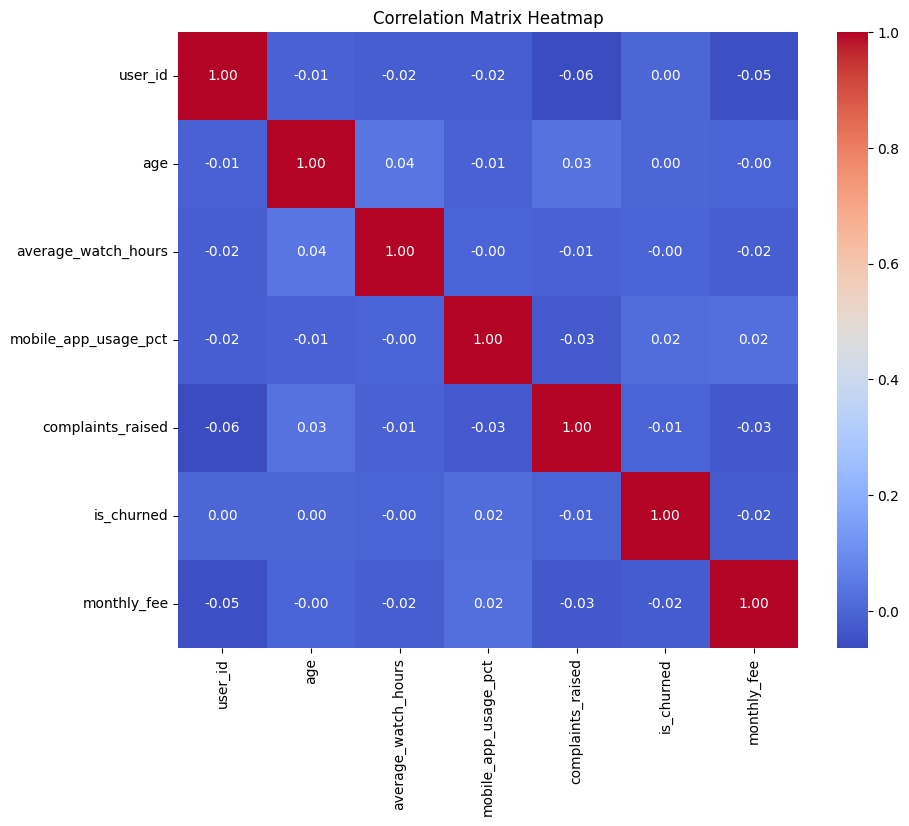

In [7]:
print("\n The Correlation Matrix for Numeric Variables")

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("correlation_matrix")

print("\n The Heatmap of Correlation Matrix")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
from os import replace
print("Task 2: Clean & Prepare the Data")

df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'], errors='coerce')
print("I have converted the 'signup_date' and the 'last_active_date' to datetime.")

df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

df['tenure_days'] = df['tenure_days'].apply(lambda x: max(0, x) if pd.notna(x) else x)
print("Calculated 'tenure_days' feature.")


df['is_loyal'] = (df['tenure_days'] > 180).astype(int)
print("Created 'is_loyal' feature.")

categorical_cols = ['gender', 'country', 'subscription_type', 'received_promotions', 'referred_by_friend']
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip().replace({'nan': 'Unknown'})

df['received_promotions'] = df['received_promotions'].replace({'Yes': 1, 'No': 0, 'Unknown': -1}).astype(int)
df['referred_by_friend'] = df['referred_by_friend'].replace({'Yes': 1, 'No': 0, 'Unknown': -1}).astype(int)
print("Standardized and converted 'received_promotions' and 'referred_by_friend' to 0/1.")

df = pd.get_dummies(df, columns=['gender', 'country', 'subscription_type'], drop_first=True, dtype=int)
print("Encoded 'gender', 'country', and 'subscription_type' using One-Hot Encoding.")


print("\nMissing values BEFORE final fill/drop (after new features & encoding):")
print(df.isnull().sum())


numeric_cols_to_fill = ['monthly_fee', 'average_watch_hours', 'mobile_app_usage_pct', 'age', 'complaints_raised', 'tenure_days']
for col in numeric_cols_to_fill:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with its median ({median_val}).")


initial_rows = len(df)
df.dropna(subset=['user_id', 'signup_date', 'last_active_date'], inplace=True)
rows_dropped = initial_rows - len(df)
if rows_dropped > 0:
    print(f"Dropped {rows_dropped} rows due to missing essential 'user_id', 'signup_date', or 'last_active_date'.")

print("\nMissing values AFTER final fill/drop:")
print(df.isnull().sum())

print("\n--- Data Cleaning & Preparation Complete! ---")
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df.head())
print("\nInfo of the cleaned DataFrame:")
df.info()

Task 2: Clean & Prepare the Data
I have converted the 'signup_date' and the 'last_active_date' to datetime.
Calculated 'tenure_days' feature.
Created 'is_loyal' feature.
Standardized and converted 'received_promotions' and 'referred_by_friend' to 0/1.
Encoded 'gender', 'country', and 'subscription_type' using One-Hot Encoding.

Missing values BEFORE final fill/drop (after new features & encoding):
user_id                         2
age                             3
signup_date                     2
last_active_date                2
average_watch_hours             4
mobile_app_usage_pct            2
complaints_raised               3
received_promotions             0
referred_by_friend              0
is_churned                      1
monthly_fee                   145
tenure_days                     4
is_loyal                        0
gender_Male                     0
gender_Other                    0
gender_Unknown                  0
country_France                  0
country_Germany      

/tmp/ipython-input-13-2141354948.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['received_promotions'] = df['received_promotions'].replace({'Yes': 1, 'No': 0, 'Unknown': -1}).astype(int)
/tmp/ipython-input-13-2141354948.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['referred_by_friend'] = df['referred_by_friend'].replace({'Yes': 1, 'No': 0, 'Unknown': -1}).astype(int)
/tmp/ipython-input-13-2141354948.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment u

Task 3: Statistical Analysis

 Chi-square Test: Gender vs. Churn 
Received Promotions vs. Churn: Chi2 = 12.15, P-value = 0.002
Referred by Friend vs. Churn: Chi2 = 1.26, P-value = 0.533

--- T-test: Average Watch Hours vs. Churn ---
Average Watch Hours vs. Churn: T-statistic = -0.15, P-value = 0.883
Mean Watch Hours (Churned): 39.80
Mean Watch Hours (Retained): 40.01

 The Visualizations: Differences between Churned and Retained Users


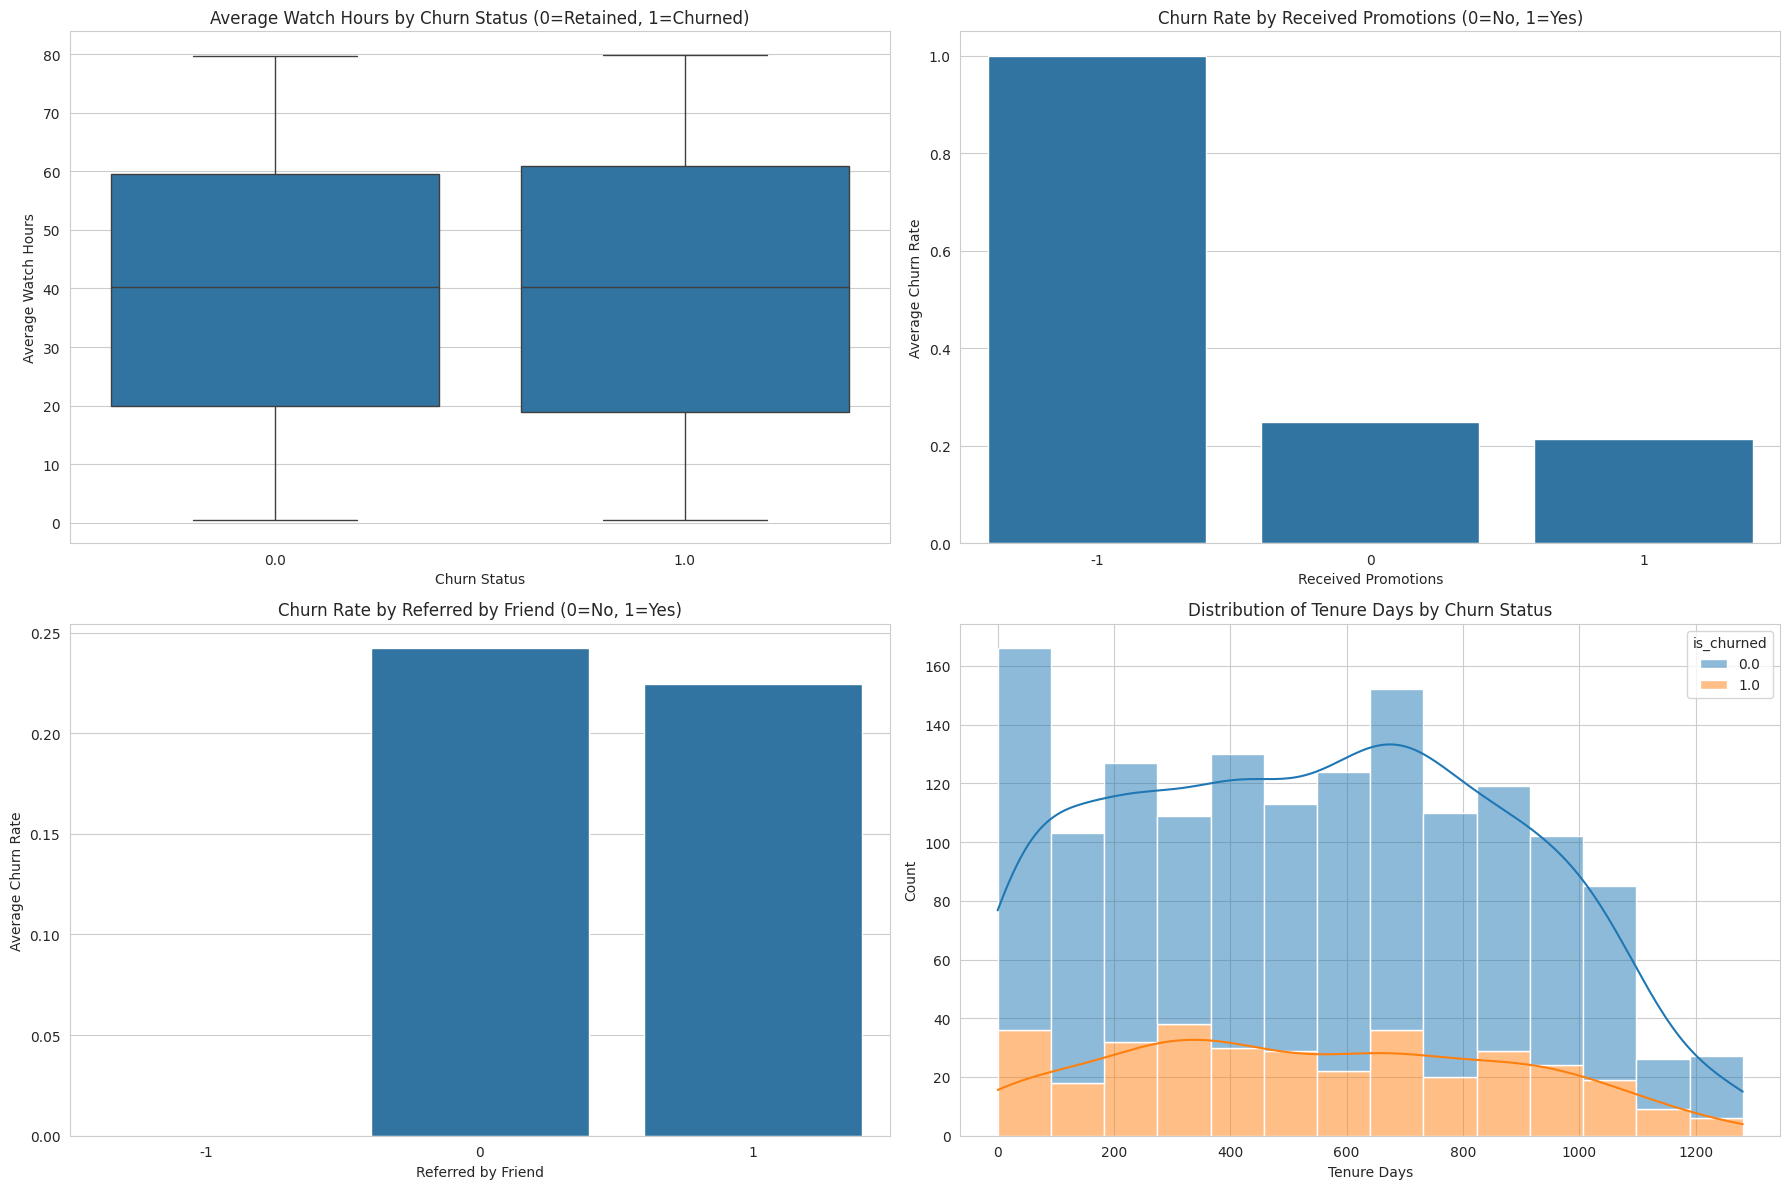


 The Statistical Analysis & Insights has been completed!


In [15]:
from scipy.stats import chi2_contingency, ttest_ind

print("Task 3: Statistical Analysis")

print("\n Chi-square Test: Gender vs. Churn ")


contingency_table_promotions = pd.crosstab(df['received_promotions'], df['is_churned'])
chi2_promotions, p_promotions, dof_promotions, expected_promotions = chi2_contingency(contingency_table_promotions)
print(f"Received Promotions vs. Churn: Chi2 = {chi2_promotions:.2f}, P-value = {p_promotions:.3f}")

contingency_table_referred = pd.crosstab(df['referred_by_friend'], df['is_churned'])
chi2_referred, p_referred, dof_referred, expected_referred = chi2_contingency(contingency_table_referred)
print(f"Referred by Friend vs. Churn: Chi2 = {chi2_referred:.2f}, P-value = {p_referred:.3f}")


print("\n--- T-test: Average Watch Hours vs. Churn ---")

churned_watch_hours = df[df['is_churned'] == 1]['average_watch_hours']
retained_watch_hours = df[df['is_churned'] == 0]['average_watch_hours']

t_stat_watch_hours, p_value_watch_hours = ttest_ind(churned_watch_hours.dropna(), retained_watch_hours.dropna())
print(f"Average Watch Hours vs. Churn: T-statistic = {t_stat_watch_hours:.2f}, P-value = {p_value_watch_hours:.3f}")
print(f"Mean Watch Hours (Churned): {churned_watch_hours.mean():.2f}")
print(f"Mean Watch Hours (Retained): {retained_watch_hours.mean():.2f}")

print("\n The Visualizations: Differences between Churned and Retained Users")


plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")


plt.subplot(2, 2, 1)
# Use the cleaned DataFrame 'df' instead of 'df_analysis'
sns.boxplot(x='is_churned', y='average_watch_hours', data=df)
plt.title('Average Watch Hours by Churn Status (0=Retained, 1=Churned)')
plt.xlabel('Churn Status')
plt.ylabel('Average Watch Hours')


plt.subplot(2, 2, 2)
# Use the cleaned DataFrame 'df' instead of 'df_analysis'
churn_rate_promotions = df.groupby('received_promotions')['is_churned'].mean().reset_index()
sns.barplot(x='received_promotions', y='is_churned', data=churn_rate_promotions)
plt.title('Churn Rate by Received Promotions (0=No, 1=Yes)')
plt.xlabel('Received Promotions')
plt.ylabel('Average Churn Rate')


plt.subplot(2, 2, 3)
# Use the cleaned DataFrame 'df' instead of 'df_analysis'
churn_rate_referred = df.groupby('referred_by_friend')['is_churned'].mean().reset_index()
sns.barplot(x='referred_by_friend', y='is_churned', data=churn_rate_referred)
plt.title('Churn Rate by Referred by Friend (0=No, 1=Yes)')
plt.xlabel('Referred by Friend')
plt.ylabel('Average Churn Rate')


plt.subplot(2, 2, 4)
# Use the cleaned DataFrame 'df' instead of 'df_analysis'
sns.histplot(data=df, x='tenure_days', hue='is_churned', kde=True, multiple='stack')
plt.title('Distribution of Tenure Days by Churn Status')
plt.xlabel('Tenure Days')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("\n The Statistical Analysis & Insights has been completed!")

Task 4: Predictive Modelling
This data iis split into training (1045 samples) and test (448 samples) sets.
The features scaled using StandardScaler have been implemented.
The Logistical Regression model has been trained.
Predictions made on the test set.

 Model Evaluation

 Confusion Matrix:
[[344   0]
 [104   0]]


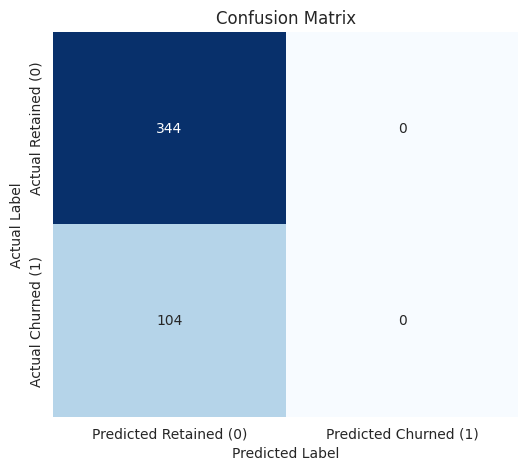


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       344
           1       0.00      0.00      0.00       104

    accuracy                           0.77       448
   macro avg       0.38      0.50      0.43       448
weighted avg       0.59      0.77      0.67       448


ROC AUC Score: 0.554


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


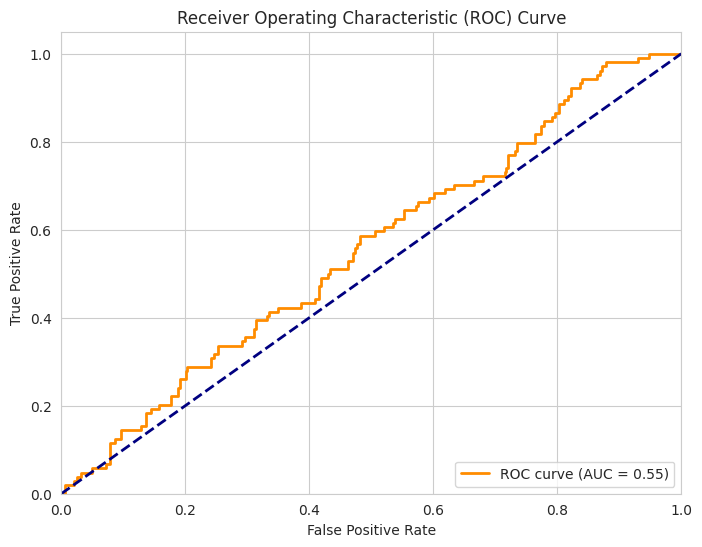


--- Top 3 Predictors of Churn from Model Coefficients ---
                      Feature  Coefficient  Abs_Coefficient
8                    is_loyal     0.157526         0.157526
9                 gender_Male    -0.136883         0.136883
17            country_Unknown    -0.131930         0.131930
20  subscription_type_Unknown    -0.127041         0.127041
7                 tenure_days    -0.112854         0.112854

--- Predictive Modelling Complete! ---


In [20]:
from math import nan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Task 4: Predictive Modelling")


df_model = df.copy()
df_model.dropna(subset=['is_churned'], inplace=True)
df_model['is_churned'] = df_model['is_churned'].astype(int)


X = df_model.drop(columns=['user_id', 'signup_date', 'last_active_date', 'is_churned'])
y = df_model['is_churned']

nan_in_X = X.isnull().sum()[X.isnull().sum() > 0]
if not nan_in_X.empty:
  print(f"Warning: NaN values found in the features before scaling:\n {nan_in_X}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"This data iis split into training ({len(X_train)} samples) and test ({len(X_test)} samples) sets.")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("The features scaled using StandardScaler have been implemented.")


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
print("The Logistical Regression model has been trained.")

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)
print("Predictions made on the test set.")


print("\n Model Evaluation")


conf_matrix = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Retained (0)', 'Predicted Churned (1)'],
            yticklabels=['Actual Retained (0)', 'Actual Churned (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(f"\nROC AUC Score: {auc_score:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


print("\n--- Top 3 Predictors of Churn from Model Coefficients ---")

coefficients = model.coef_[0]
feature_names = X.columns


feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance_sorted.head(5))

print("\n--- Predictive Modelling Complete! ---")